<a href="https://colab.research.google.com/github/abaraldo/Decision-Tree-from-Scratch/blob/master/TCC_fase_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1O3E5Q2vR0AWPQ8gUPiTZ1b1fWamBLB2P'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('pnad2016.csv')

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1hZfLSw-ptHuhFgvinCgMQ9MbByMv-QI2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('pnad2017.csv')

In [0]:
import pandas as pd

In [0]:
pnad2016_rend = pd.read_csv('pnad2016.csv')
pnad2017_rend = pd.read_csv('pnad2017.csv')

In [0]:
pnad2017_rend.sample(10)

,Unnamed: 0,uf,domicilio,area,num_pess,sexo,idade,cor,ler_escr,freq_escola,...,geladeira,televisao,computador,internet,automovel,cond_familia,anos_estudo,grupo_atividade,horas_semana,rendo_efetivo_total
123204,313478,São Paulo,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",3,Homem,64,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Pessoa responsável,10,"Transporte, armazenagem e correio",0,8200.0
133643,335063,São Paulo,Urbana,"Resto da RM (Região Metropolitana, excluindo a...",3,Mulher,47,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Cônjuge ou companheiro(a),7,"Comércio, reparação de veículos automotores e ...",42,900.0
118167,302942,São Paulo,Urbana,"Resto da RM (Região Metropolitana, excluindo a...",5,Mulher,25,Branca,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, de tela fina e de tubo",Não,Sim,Sim,Filho(a),10,"Comércio, reparação de veículos automotores e ...",0,1400.0
37541,101105,Piauí,Urbana,Capital,5,Mulher,40,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Cônjuge ou companheiro(a),5,Serviços domésticos,42,500.0
86318,232737,Minas Gerais,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",2,Homem,54,Branca,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tubo",Não,Não,Sim,Pessoa responsável,14,"Comércio, reparação de veículos automotores e ...",0,2000.0
79863,218094,Bahia,Rural,"Resto da UF (Unidade da Federação, excluindo ...",2,Homem,29,Parda,Sim,Não,...,"Sim, de 1 porta","Sim, somente de tubo",Não,Não,Sim,Pessoa responsável,8,"Agricultura, pecuária, produção florestal, pes...",0,500.0
75344,206385,Bahia,Rural,"Resto da UF (Unidade da Federação, excluindo ...",4,Mulher,39,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Cônjuge ou companheiro(a),11,"Agricultura, pecuária, produção florestal, pes...",42,170.0
24690,62946,Tocantins,Urbana,Capital,4,Homem,37,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Pessoa responsável,0,Indústria geral,8,11000.0
60302,162830,Pernambuco,Urbana,"Resto da RM (Região Metropolitana, excluindo a...",4,Mulher,45,Parda,Sim,Não,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Filho(a),10,"Informação, comunicação e atividades financeir...",42,1000.0
115005,295822,Rio de Janeiro,Urbana,Capital,2,Homem,29,Branca,Sim,Sim,...,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Filho(a),0,"Informação, comunicação e atividades financeir...",0,5000.0


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf

import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras.backend
import keras.layers
import keras.models
import keras.utils
from keras.optimizers import Adam

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def one_hot(y):
    n = y.shape[0]
    m = y.shape[1]
    
    list_y = list()
    for i in range(n):
        idx = np.argmax(y[i])
        oh = np.zeros(m)
        oh[idx] = 1
        list_y.append(oh)
    
    return np.array(list_y)
  
  


Using TensorFlow backend.


In [0]:
frames = [pnad2016_rend, pnad2017_rend]
pnad_completo = pd.concat(frames)
pnad_completo.reset_index(drop = True, inplace=True)
pnad_completo = pnad_completo.drop('Unnamed: 0', axis = 1)
pnad_completo.rendo_efetivo_total.describe()

count     387561.000000
mean        1970.174460
std         3747.495255
min            0.000000
25%          880.000000
50%         1200.000000
75%         2000.000000
max      1000000.000000
Name: rendo_efetivo_total, dtype: float64

In [0]:
pnad_completo.grupo_atividade.value_counts()

Comércio, reparação de veículos automotores e motocicletas                                         68819
Agricultura, pecuária, produção florestal, pesca e aquicultura                                     60219
Indústria geral                                                                                    43274
Educação, saúde humana e serviços sociais                                                          42390
Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas    33021
Construção                                                                                         29016
Serviços domésticos                                                                                25972
Administração pública, defesa e seguridade social                                                  22624
Alojamento e alimentação                                                                           18793
Transporte, armazenagem e correio                      

In [0]:
pnad_completo = pnad_completo.loc[pnad_completo.cond_familia.isin(['Pessoa responsável', 'Cônjuge ou companheiro(a)'])]

pnad_completo.uf.loc[pnad_completo.uf.isin(['São Paulo', 'Minas Gerais', 'Rio de Janeiro','Espírito Santo'])] = 'Sudeste'
pnad_completo.uf.loc[pnad_completo.uf.isin(['Santa Catarina', 'Paraná', 'Rio Grande do Sul'])] = 'Sul'
pnad_completo.uf.loc[pnad_completo.uf.isin([ 'Bahia', 'Ceará', 'Pernambuco', 'Alagoas', 'Paraíba', 'Piauí', 'Maranhão', 'Rio Grande do Norte', 'Sergipe'])] = 'Nordeste'
pnad_completo.uf.loc[pnad_completo.uf.isin(['Amazonas', 'Rondônia', 'Acre', 'Roraima', 'Amapá', 'Tocantins', 'Pará'])] = 'Norte'
pnad_completo.uf.loc[pnad_completo.uf.isin(['Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Goiás'])] = 'Centro-Oeste'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
pnad_completo.reset_index(inplace = True, drop=True)
pnad_completo.info()
pnad_completo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291103 entries, 0 to 291102
Data columns (total 27 columns):
uf                     291103 non-null object
domicilio              291103 non-null object
area                   291103 non-null object
num_pess               291103 non-null int64
sexo                   291103 non-null object
idade                  291103 non-null int64
cor                    291103 non-null object
ler_escr               291103 non-null object
freq_escola            291103 non-null object
tipo_dom               291103 non-null object
comodos                291103 non-null int64
abst_agua              291103 non-null object
dejetos                291103 non-null object
lixo                   291103 non-null object
ori_energ              291103 non-null object
disp_energ             291103 non-null object
pess_cel               291103 non-null int64
geladeira              291103 non-null object
televisao              291103 non-null object
computador         

,uf,domicilio,area,num_pess,sexo,idade,cor,ler_escr,freq_escola,tipo_dom,comodos,abst_agua,dejetos,lixo,ori_energ,disp_energ,pess_cel,geladeira,televisao,computador,internet,automovel,cond_familia,anos_estudo,grupo_atividade,horas_semana,rendo_efetivo_total
0,Norte,Urbana,Capital,1,Mulher,55,Parda,Sim,Não,Casa,4,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Pessoa responsável,4,"Administração pública, defesa e seguridade soc...",42,1100.0
1,Norte,Urbana,Capital,6,Homem,66,Parda,Sim,Não,Casa,6,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",2,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Pessoa responsável,0,Construção,42,1500.0
2,Norte,Urbana,Capital,4,Homem,41,Parda,Sim,Não,Casa,7,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",3,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Pessoa responsável,8,"Administração pública, defesa e seguridade soc...",42,1500.0
3,Norte,Urbana,Capital,4,Mulher,39,Parda,Sim,Não,Casa,7,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",3,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Cônjuge ou companheiro(a),8,"Educação, saúde humana e serviços sociais",42,1500.0
4,Norte,Urbana,Capital,1,Homem,55,Parda,Sim,Não,Casa,5,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 1 porta","Sim, somente de tubo",Não,Sim,Sim,Pessoa responsável,10,"Transporte, armazenagem e correio",55,4000.0


In [0]:
#labels = ['< 900', '900 - 1.800', '1.801 - 4.000', '4.001 - 8.000', '> 8.000']

labels = ['< 500', '500 - 1.800', '1.801 - 5.400', '5.401 - 9.000', '9000 - 18.000', '> 18.000']

pnad_completo['rend_cat'] = pd.cut(pnad_completo.rendo_efetivo_total, 
                                   [0, 500, 1800, 5400, 9000,18000, 10000000], right=False, labels=labels)

pnad_completo.head(10)

,uf,domicilio,area,num_pess,sexo,idade,cor,ler_escr,freq_escola,tipo_dom,comodos,abst_agua,dejetos,lixo,ori_energ,disp_energ,pess_cel,geladeira,televisao,computador,internet,automovel,cond_familia,anos_estudo,grupo_atividade,horas_semana,rendo_efetivo_total,rend_cat
0,Norte,Urbana,Capital,1,Mulher,55,Parda,Sim,Não,Casa,4,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Pessoa responsável,4,"Administração pública, defesa e seguridade soc...",42,1100.0,500 - 1.800
1,Norte,Urbana,Capital,6,Homem,66,Parda,Sim,Não,Casa,6,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",2,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Não,Pessoa responsável,0,Construção,42,1500.0,500 - 1.800
2,Norte,Urbana,Capital,4,Homem,41,Parda,Sim,Não,Casa,7,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",3,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Pessoa responsável,8,"Administração pública, defesa e seguridade soc...",42,1500.0,500 - 1.800
3,Norte,Urbana,Capital,4,Mulher,39,Parda,Sim,Não,Casa,7,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",3,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Cônjuge ou companheiro(a),8,"Educação, saúde humana e serviços sociais",42,1500.0,500 - 1.800
4,Norte,Urbana,Capital,1,Homem,55,Parda,Sim,Não,Casa,5,Rede geral de distribuição,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 1 porta","Sim, somente de tubo",Não,Sim,Sim,Pessoa responsável,10,"Transporte, armazenagem e correio",55,4000.0,1.801 - 5.400
5,Norte,Urbana,Capital,5,Homem,46,Parda,Sim,Não,Casa,6,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",5,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Pessoa responsável,4,Indústria geral,42,3000.0,1.801 - 5.400
6,Norte,Urbana,Capital,1,Mulher,44,Parda,Sim,Não,Casa,6,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Pessoa responsável,8,"Informação, comunicação e atividades financeir...",42,8000.0,5.401 - 9.000
7,Norte,Urbana,Capital,1,Homem,60,Branca,Sim,Não,Casa,5,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",1,"Sim, de 1 porta","Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Sim,Pessoa responsável,4,Construção,20,1760.0,500 - 1.800
8,Norte,Urbana,Capital,3,Homem,58,Parda,Sim,Não,Casa,4,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",3,"Sim, de 2 (ou mais) portas","Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Não,Cônjuge ou companheiro(a),4,Construção,42,2800.0,1.801 - 5.400
9,Norte,Urbana,Capital,3,Homem,38,Parda,Sim,Sim,Apartamento,3,Poço profundo ou artesiano,Fossa não ligada à rede,Coletado diretamente por serviço de limpeza,Utiliza ao menos uma fonte de energia eletrica,"Diária, em tempo integral",2,"Sim, de 1 porta","Sim, somente de tela fina (LED,

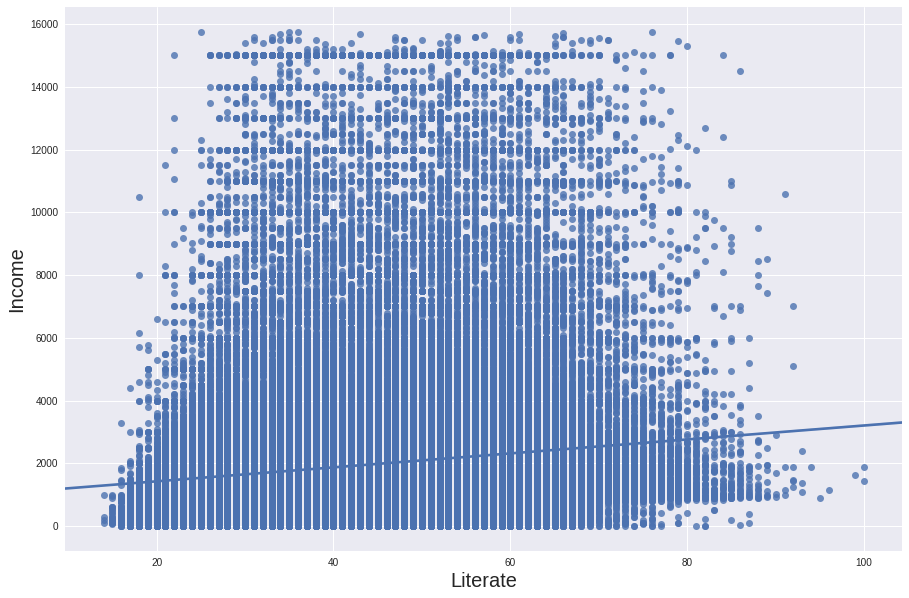

In [0]:
coluna_x = 'rendo_efetivo_total'
q = pnad_completo['rendo_efetivo_total'].quantile(0.99)


#f, ax = plt.subplots()
plt.figure(figsize=(15,10))
sns.regplot(x="idade", y="rendo_efetivo_total", data=pnad_completo[pnad_completo['rendo_efetivo_total'] < q])
plt.xlabel('Literate', fontsize = 20)
plt.ylabel('Income',fontsize = 20)

#plt.plot(LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q][LRP_class.columns[coluna_x]].mean())
#sns.despine(offset=10, trim=True)
plt.show()

In [0]:
pnad_completo.ix[67946]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


uf                                                               Sudeste
domicilio                                                         Urbana
area                                                             Capital
num_pess                                                               3
sexo                                                               Homem
idade                                                                 33
cor                                                                Preta
ler_escr                                                             Sim
freq_escola                                                         Não 
tipo_dom                                                            Casa
comodos                                                                5
abst_agua                                    Rede geral de distribuição 
dejetos                  Rede geral, rede pluvial ou fossa ligada à rede
lixo                        Coletado diretamente po

In [0]:
cat_columns = ['uf', 'domicilio', 'area', 'sexo', 'cor', 'ler_escr', 'freq_escola','tipo_dom', 'abst_agua',
               'dejetos', 'lixo', 'ori_energ', 'disp_energ','geladeira', 'televisao', 'computador', 'internet',
               'automovel','grupo_atividade']

In [0]:
pnad_completo_processed = pd.get_dummies(pnad_completo, prefix_sep="__",columns=cat_columns)
pnad_completo_processed.reset_index(drop = True, inplace=True)

In [0]:
X = pnad_completo_processed.drop(['cond_familia','rendo_efetivo_total', 'rend_cat'], axis = 1)
y = pd.get_dummies(pnad_completo.rend_cat, prefix_sep="__",columns=['rend_cat'])

Train on 241524 samples, validate on 118961 samples
Epoch 1/50
241524/241524 [==============================] - 5s 20us/step - loss: 0.6093 - acc: 0.7948 - val_loss: 0.5123 - val_acc: 0.8155
Epoch 2/50
241524/241524 [==============================] - 3s 13us/step - loss: 0.4873 - acc: 0.8230 - val_loss: 0.4947 - val_acc: 0.8191
Epoch 3/50
241524/241524 [==============================] - 3s 13us/step - loss: 0.4644 - acc: 0.8283 - val_loss: 0.4980 - val_acc: 0.8129
Epoch 4/50
241524/241524 [==============================] - 3s 13us/step - loss: 0.4476 - acc: 0.8312 - val_loss: 0.4817 - val_acc: 0.8154
Epoch 5/50
241524/241524 [==============================] - 3s 13us/step - loss: 0.4345 - acc: 0.8327 - val_loss: 0.4567 - val_acc: 0.8222
Epoch 6/50
241524/241524 [==============================] - 3s 12us/step - loss: 0.4234 - acc: 0.8339 - val_loss: 0.4608 - val_acc: 0.8137
Epoch 7/50
241524/241524 [==============================] - 3s 13us/step - loss: 0.4137 - acc: 0.8350 - val_loss: 

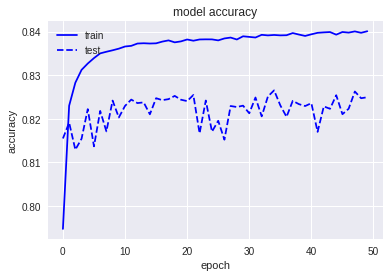

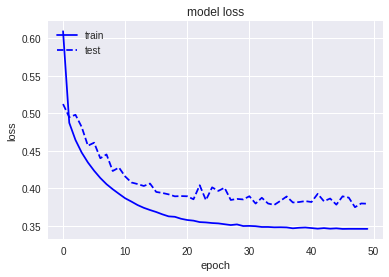

In [0]:
model = Sequential()
model.add(Dense(1024, activation='tanh', input_dim=80,kernel_regularizer = regularizers.l2(l = 0.0001)))
#model.add(Dropout(0.25))
model.add(Dense(512, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.0001)))
model.add(Dropout(0.25))
model.add(Dense(512, activation='tanh', kernel_regularizer = regularizers.l2(l = 0.0001)))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.fit(X_train.values, y_train.values,epochs=20, batch_size=100, validation_data=(X_test.values, y_test.values))
#score = model.evaluate(X_test.values, y_test.values, batch_size=100)


history = model.fit(X, y, validation_split=0.33, epochs=50, batch_size=2000, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],'b-')
plt.plot(history.history['val_acc'],'b--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'b--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

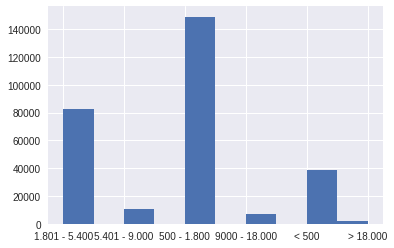

In [0]:
pnad_completo.rend_cat.hist()

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
pnad_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291103 entries, 0 to 291102
Data columns (total 28 columns):
uf                     291103 non-null object
domicilio              291103 non-null object
area                   291103 non-null object
num_pess               291103 non-null int64
sexo                   291103 non-null object
idade                  291103 non-null int64
cor                    291103 non-null object
ler_escr               291103 non-null object
freq_escola            291103 non-null object
tipo_dom               291103 non-null object
comodos                291103 non-null int64
abst_agua              291103 non-null object
dejetos                291103 non-null object
lixo                   291103 non-null object
ori_energ              291103 non-null object
disp_energ             291103 non-null object
pess_cel               291103 non-null int64
geladeira              291103 non-null object
televisao              291103 non-null object
computador         

In [0]:
pnad_completo_processed = pd.get_dummies(pnad_completo, prefix_sep="__",columns=cat_columns)
#pnad_completo_processed.reset_index(drop = True, inplace=True)
pnad_completo_processed.head()
pnad_completo_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291103 entries, 0 to 291102
Data columns (total 83 columns):
num_pess                                                                                                            291103 non-null int64
idade                                                                                                               291103 non-null int64
comodos                                                                                                             291103 non-null int64
pess_cel                                                                                                            291103 non-null int64
cond_familia                                                                                                        291103 non-null object
anos_estudo                                                                                                         291103 non-null int64
horas_semana                                                

In [0]:
X = pnad_completo_processed.drop(['cond_familia','rendo_efetivo_total', 'rend_cat', 'comodos'], axis = 1)
y = pd.get_dummies(pnad_completo.rend_cat, prefix_sep="__",columns=['rend_cat'])
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291103 entries, 0 to 291102
Data columns (total 79 columns):
num_pess                                                                                                            291103 non-null int64
idade                                                                                                               291103 non-null int64
pess_cel                                                                                                            291103 non-null int64
anos_estudo                                                                                                         291103 non-null int64
horas_semana                                                                                                        291103 non-null int64
uf__Centro-Oeste                                                                                                    291103 non-null uint8
uf__Nordeste                                                 

In [0]:
X_minmax = scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(data = X_minmax, columns = X.columns, index = X.index)
X_minmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291103 entries, 0 to 291102
Data columns (total 79 columns):
num_pess                                                                                                            291103 non-null float64
idade                                                                                                               291103 non-null float64
pess_cel                                                                                                            291103 non-null float64
anos_estudo                                                                                                         291103 non-null float64
horas_semana                                                                                                        291103 non-null float64
uf__Centro-Oeste                                                                                                    291103 non-null float64
uf__Nordeste                                     

In [0]:
X_minmax_df.ix[67946]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


num_pess                                                                                                            0.086957
idade                                                                                                               0.220930
pess_cel                                                                                                            0.142857
anos_estudo                                                                                                         0.666667
horas_semana                                                                                                        0.763636
                                                                                                                      ...   
grupo_atividade__Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas    1.000000
grupo_atividade__Outros Serviços                                                                                    0.000000


In [0]:
y.ix[67946]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


< 500            0
500 - 1.800      0
1.801 - 5.400    1
5.401 - 9.000    0
9000 - 18.000    0
> 18.000         0
Name: 67946, dtype: uint8

In [0]:
pnad_completo.ix[67946]

uf                                                               Sudeste
domicilio                                                         Urbana
area                                                             Capital
num_pess                                                               3
sexo                                                               Homem
idade                                                                 33
cor                                                                Preta
ler_escr                                                             Sim
freq_escola                                                         Não 
tipo_dom                                                            Casa
comodos                                                                5
abst_agua                                    Rede geral de distribuição 
dejetos                  Rede geral, rede pluvial ou fossa ligada à rede
lixo                        Coletado diretamente po

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax_df, y, test_size=0.2, random_state=1)

In [0]:
y_train.ix[67946]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


< 500            0
500 - 1.800      0
1.801 - 5.400    1
5.401 - 9.000    0
9000 - 18.000    0
> 18.000         0
Name: 67946, dtype: uint8

# Modelagem Classica

In [0]:
y_train.sample().to_dense()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


rend_cat,< 500,500 - 1.800,1.801 - 5.400,5.401 - 9.000,9000 - 18.000,> 18.000
202159,0,1,0,0,0,0


In [0]:
lr = LogisticRegression(multi_class='ovr')
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(lr)
lr_param = {'penalty': ['l2'],
                 'C': [1,10]}


gscv = GridSearchCV(clf, cv=2, verbose=2, scoring='roc_auc')
best_model_lr = gscv.fit(X_train, y_train)

TypeError: ignored

In [0]:
rf = RandomForestClassifier(min_samples_leaf=5)
rf_param = {'n_estimators': [10, 50, 200],
                 'max_features': ['auto'],
                 'criterion': ['gini', 'entropy']}

knn = KNeighborsClassifier()
knn_param = {'n_neighbors': [5],
                 'weights': ['distance']}

lr = LogisticRegression(multi_class='ovr')
lr_param = {'penalty': ['l2'],
                 'C': [1,10]}

gscv = GridSearchCV(rf, rf_param, cv=3, verbose=2, scoring='roc_auc')
best_model_rf = gscv.fit(X_train, y_train)

gscv = GridSearchCV(knn, knn_param, cv=2, verbose=2, scoring='roc_auc')
best_model_knn = gscv.fit(X_train, y_train)

gscv = GridSearchCV(lr, lr_param, cv=2, verbose=2, scoring='roc_auc')
best_model_lr = gscv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   4.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   4.2s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, total=   4.2s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=  20.0s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=  19.9s
[CV] criterion=gini, max_features=auto, n_estimators=50 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=50, total=  20.0s
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200, total= 1.3min
[CV] criterion=gini, max_features=auto, n_estimators=200 .............
[CV]  criterion=gini, max_features=auto, n_estimators=200, total= 1.4min
[CV] criterion=gini, max_features=auto, n_estimators=200 ...........

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 10.8min finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] n_neighbors=5, weights=distance .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. n_neighbors=5, weights=distance, total=33.2min
[CV] n_neighbors=5, weights=distance .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.2min remaining:    0.0s


[CV] .................. n_neighbors=5, weights=distance, total=26.6min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 59.8min finished


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.1s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.1s
[CV] C=10, penalty=l2 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (116441, 6)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (116441, 6)

  FitFailedWarning)


[CV] ................................. C=10, penalty=l2, total=   0.1s
[CV] C=10, penalty=l2 ................................................
[CV] ................................. C=10, penalty=l2, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (116441, 6)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (116441, 6)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished


ValueError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print('Random Forest')
pred = best_model_rf.predict(X_test)
#print(confusion_matrix(y_test.values, pred))
print(classification_report(y_test, pred))
print("The final AUC from ROC curve from the best model in our unseen test dataset is: {}".format(round(roc_auc_score(y_test, pred),2)))
print('==============================================================================================================================')

print('KNN')
pred = best_model_knn.predict(X_test)
#print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("The final AUC from ROC curve from the best model in our unseen test dataset is: {}".format(round(roc_auc_score(y_test, pred),2)))
print('==============================================================================================================================')



Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      0.34      0.47      7750
           1       0.67      0.78      0.72     29758
           2       0.60      0.33      0.42     16658
           3       0.00      0.00      0.00      2155
           4       0.00      0.00      0.00      1430
           5       0.00      0.00      0.00       470

   micro avg       0.66      0.54      0.59     58221
   macro avg       0.34      0.24      0.27     58221
weighted avg       0.61      0.54      0.55     58221
 samples avg       0.54      0.54      0.54     58221

The final AUC from ROC curve from the best model in our unseen test dataset is: 0.58
KNN
              precision    recall  f1-score   support

           0       0.54      0.38      0.45      7750
           1       0.63      0.65      0.64     29758
           2       0.48      0.41      0.44     16658
           3       0.18      0.06      0.09      2155
           4       0.20      0.08      0.11

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
y_test.values

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

# ANN com dados padronizados

In [0]:
checkpoint_path = "./cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

!ls {checkpoint_dir}

adc.json  cp.ckpt  pnad2016.csv  pnad2017.csv  sample_data


Train on 232882 samples, validate on 58221 samples
Epoch 1/50
232882/232882 [==============================] - 16s 68us/step - loss: 0.4577 - acc: 0.8558 - val_loss: 0.3815 - val_acc: 0.8681

Epoch 00001: val_acc improved from -inf to 0.86813, saving model to ./cp.ckpt
Epoch 2/50
232882/232882 [==============================] - 15s 66us/step - loss: 0.3565 - acc: 0.8655 - val_loss: 0.3267 - val_acc: 0.8699

Epoch 00002: val_acc improved from 0.86813 to 0.86990, saving model to ./cp.ckpt
Epoch 3/50
232882/232882 [==============================] - 15s 66us/step - loss: 0.3168 - acc: 0.8673 - val_loss: 0.3013 - val_acc: 0.8714

Epoch 00003: val_acc improved from 0.86990 to 0.87138, saving model to ./cp.ckpt
Epoch 4/50
232882/232882 [==============================] - 15s 66us/step - loss: 0.2990 - acc: 0.8683 - val_loss: 0.2905 - val_acc: 0.8708

Epoch 00004: val_acc did not improve from 0.87138
Epoch 5/50
232882/232882 [==============================] - 15s 66us/step - loss: 0.2907 - acc:

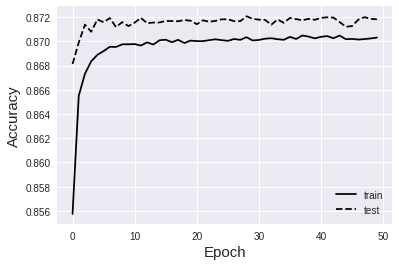

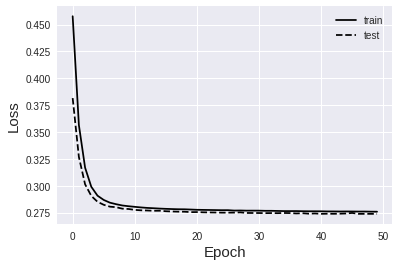

In [0]:
model = Sequential()
model.add(Dense(75, activation='tanh', input_dim=79,kernel_regularizer = regularizers.l2(l = 0.001)))
model.add(Dropout(0.15))
model.add(Dense(75, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.001)))
model.add(Dropout(0.15))
model.add(Dense(50, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.001)))
model.add(Dropout(0.15))
model.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.07, decay=1e-6, momentum=0.9, nesterov=True)


# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                               save_weights_only=True, save_best_only = True, monitor='val_acc',
                                                 verbose=1)


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#model.fit(X_train.values, y_train.values,epochs=20, batch_size=100, validation_data=(X_test.values, y_test.values))
#score = model.evaluate(X_test.values, y_test.values, batch_size=100)


#history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=2000, verbose=1)

history = model.fit(X_train.values, y_train.values,epochs=50, batch_size=128,verbose=1, validation_data=(X_test.values, y_test.values), callbacks = [cp_callback])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],'k-')
plt.plot(history.history['val_acc'],'k--')
#plt.title('model accuracy')
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch',fontsize = 15)
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'k-')
plt.plot(history.history['val_loss'],'k--')
#plt.title('model loss')
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

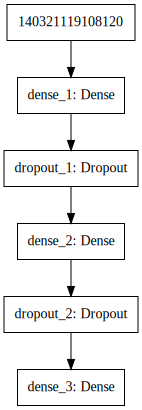

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 75)                6000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 75)                5700      
_________________________________________________________________
dropout_5 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3800      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 306       
Total para

In [0]:
model.evaluate(x=X_test, y=y_test)

58221/58221 [==============================] - 4s 67us/step


[0.27373546960825973, 0.871807430133704]

In [0]:
!pip install git+https://github.com/albermax/innvestigate
import innvestigate
import innvestigate.utils as iutils

  Cloning https://github.com/albermax/innvestigate to /tmp/pip-req-build-wc62lvvy
  Running setup.py bdist_wheel for innvestigate ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ql8gjk1/wheels/f9/54/80/d9a6e23156696217cb721897eefce270d3ad014dbb4f16c835
Successfully built innvestigate


In [0]:
class_0_ix = y_train.loc[y_train['< 500'] == 1].sample(n = 800).index
class_1_ix = y_train.loc[y_train['500 - 1.800'] == 1].sample(n = 800).index
class_2_ix = y_train.loc[y_train['1.801 - 5.400'] == 1].sample(n = 800).index
class_3_ix = y_train.loc[y_train['5.401 - 9.000'] == 1].sample(n = 800).index
class_4_ix = y_train.loc[y_train['9000 - 18.000'] == 1].sample(n = 800).index
class_5_ix = y_train.loc[y_train['> 18.000'] == 1].sample(n = 800).index

In [0]:
print(class_0_ix.shape)
print(class_1_ix.shape)
print(class_2_ix.shape)
print(class_3_ix.shape)
print(class_4_ix.shape)
print(class_0_ix)

(800,)
(800,)
(800,)
(800,)
(800,)
Int64Index([ 48089, 174868, 169112, 172942,  32599, 166375,  16991, 174870,
             30160, 179595,
            ...
             33841, 184135, 219014, 104249,  62223, 181448, 254508,  24576,
            125746,  63069],
           dtype='int64', length=800)


In [0]:
class_0_samples = X_train.ix[class_0_ix]
class_1_samples = X_train.ix[class_1_ix]
class_2_samples = X_train.ix[class_2_ix]
class_3_samples = X_train.ix[class_3_ix]
class_4_samples = X_train.ix[class_4_ix]
class_5_samples = X_train.ix[class_5_ix]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
# Create model without trailing softmax
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model)
#analyzer = innvestigate.create_analyzer("deep_taylor.bounded", model_wo_softmax, low = 0, high = 1)

analyzer = innvestigate.create_analyzer("lrp.z", model_wo_softmax)#, low = 0, high = 1)


In [0]:
LRP_class_0 = np.empty((0,79), int)
LRP_class_1 = np.empty((0,79), int)
LRP_class_2 = np.empty((0,79), int)
LRP_class_3 = np.empty((0,79), int)
LRP_class_4 = np.empty((0,79), int)
LRP_class_5 = np.empty((0,79), int)

for i in range(len(class_0_samples)):
  a = analyzer.analyze(class_0_samples.ix[class_0_ix[i]].reshape(1,79))
  LRP_class_0 = np.vstack((LRP_class_0,a))

for i in range(len(class_1_samples)):
  a = analyzer.analyze(class_1_samples.ix[class_1_ix[i]].reshape(1,79))
  LRP_class_1 = np.vstack((LRP_class_1,a))
  
for i in range(len(class_2_samples)):
  a = analyzer.analyze(class_2_samples.ix[class_2_ix[i]].reshape(1,79))
  LRP_class_2 = np.vstack((LRP_class_2,a))
  
for i in range(len(class_3_samples)):
  a = analyzer.analyze(class_3_samples.ix[class_3_ix[i]].reshape(1,79))
  LRP_class_3 = np.vstack((LRP_class_3,a))
  
for i in range(len(class_4_samples)):
  a = analyzer.analyze(class_4_samples.ix[class_4_ix[i]].reshape(1,79))
  LRP_class_4 = np.vstack((LRP_class_4,a))
  
for i in range(len(class_5_samples)):
  a = analyzer.analyze(class_5_samples.ix[class_5_ix[i]].reshape(1,79))
  LRP_class_5 = np.vstack((LRP_class_5,a))

LRP_class_0_df = pd.DataFrame(data = LRP_class_0,columns = class_0_samples.columns)
LRP_class_1_df = pd.DataFrame(data = LRP_class_1,columns = class_1_samples.columns)
LRP_class_2_df = pd.DataFrame(data = LRP_class_2,columns = class_2_samples.columns)
LRP_class_3_df = pd.DataFrame(data = LRP_class_3,columns = class_3_samples.columns)
LRP_class_4_df = pd.DataFrame(data = LRP_class_4,columns = class_4_samples.columns)
LRP_class_5_df = pd.DataFrame(data = LRP_class_5,columns = class_5_samples.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipyke

In [0]:
LRP_class_0_df['class'] = 'Class 1'
LRP_class_1_df['class'] = 'Class 2'
LRP_class_2_df['class'] = 'Class 3'
LRP_class_3_df['class'] = 'Class 4'
LRP_class_4_df['class'] = 'Class 5'
LRP_class_5_df['class'] = 'Class 6'
frames = [LRP_class_0_df, LRP_class_1_df, LRP_class_2_df,LRP_class_3_df,LRP_class_4_df,LRP_class_5_df]
LRP_class = pd.concat(frames)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


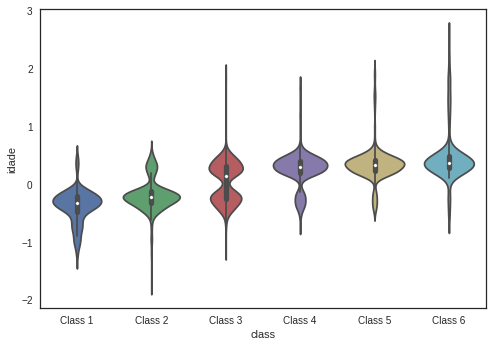

In [0]:
sns.violinplot(x="class", y="idade", data=LRP_class)

In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train.values, y_train.values)
X_ros = pd.DataFrame(data = X_ros, columns = X_train.columns)
y_ros = pd.DataFrame(data = y_ros, columns = y_train.columns)
y_ros.idxmax(axis=1).hist()


ModuleNotFoundError: ignored

# ANN com dados com RandomOverSampler

Train on 715770 samples, validate on 58221 samples
Epoch 1/50
715770/715770 [==============================] - 4s 6us/step - loss: 0.5446 - acc: 0.8373 - val_loss: 0.4955 - val_acc: 0.8301
Epoch 2/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.4716 - acc: 0.8428 - val_loss: 0.4522 - val_acc: 0.8317
Epoch 3/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.4361 - acc: 0.8443 - val_loss: 0.4242 - val_acc: 0.8330
Epoch 4/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.4115 - acc: 0.8453 - val_loss: 0.4030 - val_acc: 0.8339
Epoch 5/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.3936 - acc: 0.8459 - val_loss: 0.3882 - val_acc: 0.8347
Epoch 6/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.3811 - acc: 0.8463 - val_loss: 0.3793 - val_acc: 0.8331
Epoch 7/50
715770/715770 [==============================] - 3s 5us/step - loss: 0.3723 - acc: 0.8465 - val_loss: 0.3694 -

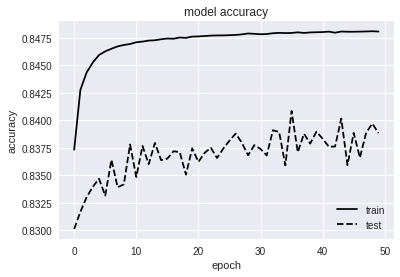

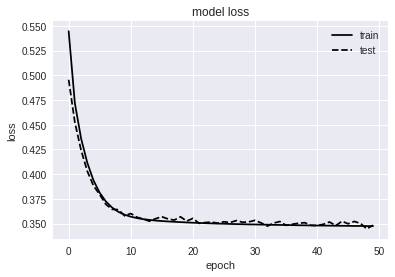

In [0]:
model_ros = Sequential()
model_ros.add(Dense(75, activation='tanh', input_dim=79,kernel_regularizer = regularizers.l2(l = 0.001)))
model_ros.add(Dropout(0.15))
model_ros.add(Dense(75, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.001)))
model_ros.add(Dropout(0.15))
model_ros.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.07, decay=1e-6, momentum=0.9, nesterov=True)




model_ros.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#model.fit(X_train.values, y_train.values,epochs=20, batch_size=100, validation_data=(X_test.values, y_test.values))
#score = model.evaluate(X_test.values, y_test.values, batch_size=100)


#history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=2000, verbose=1)

history = model_ros.fit(X_ros.values, y_ros.values,epochs=50, batch_size=2000,verbose=1, validation_data=(X_test.values, y_test.values))#, callbacks = [cp_callback])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],'k-')
plt.plot(history.history['val_acc'],'k--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'k-')
plt.plot(history.history['val_loss'],'k--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
# Create model without trailing softmax
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model_ros)
#analyzer = innvestigate.create_analyzer("deep_taylor.bounded", model_wo_softmax, low = 0, high = 1)

analyzer = innvestigate.create_analyzer("lrp.z", model_wo_softmax)#, low = 0, high = 1)



LRP_class_0 = np.empty((0,79), int)
LRP_class_1 = np.empty((0,79), int)
LRP_class_2 = np.empty((0,79), int)
LRP_class_3 = np.empty((0,79), int)
LRP_class_4 = np.empty((0,79), int)
LRP_class_5 = np.empty((0,79), int)

for i in range(len(class_0_samples)):
  a = analyzer.analyze(class_0_samples.ix[class_0_ix[i]].reshape(1,79))
  LRP_class_0 = np.vstack((LRP_class_0,a))

for i in range(len(class_1_samples)):
  a = analyzer.analyze(class_1_samples.ix[class_1_ix[i]].reshape(1,79))
  LRP_class_1 = np.vstack((LRP_class_1,a))
  
for i in range(len(class_2_samples)):
  a = analyzer.analyze(class_2_samples.ix[class_2_ix[i]].reshape(1,79))
  LRP_class_2 = np.vstack((LRP_class_2,a))
  
for i in range(len(class_3_samples)):
  a = analyzer.analyze(class_3_samples.ix[class_3_ix[i]].reshape(1,79))
  LRP_class_3 = np.vstack((LRP_class_3,a))
  
for i in range(len(class_4_samples)):
  a = analyzer.analyze(class_4_samples.ix[class_4_ix[i]].reshape(1,79))
  LRP_class_4 = np.vstack((LRP_class_4,a))
  
for i in range(len(class_5_samples)):
  a = analyzer.analyze(class_5_samples.ix[class_5_ix[i]].reshape(1,79))
  LRP_class_5 = np.vstack((LRP_class_5,a))

LRP_class_0_df = pd.DataFrame(data = LRP_class_0,columns = class_0_samples.columns)
LRP_class_1_df = pd.DataFrame(data = LRP_class_1,columns = class_1_samples.columns)
LRP_class_2_df = pd.DataFrame(data = LRP_class_2,columns = class_2_samples.columns)
LRP_class_3_df = pd.DataFrame(data = LRP_class_3,columns = class_3_samples.columns)
LRP_class_4_df = pd.DataFrame(data = LRP_class_4,columns = class_4_samples.columns)
LRP_class_5_df = pd.DataFrame(data = LRP_class_5,columns = class_5_samples.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3

In [0]:
LRP_class_3_df.mean(axis = 0)

num_pess                                                                                                           -0.059599
idade                                                                                                               0.615715
pess_cel                                                                                                            0.036672
anos_estudo                                                                                                        -0.093039
horas_semana                                                                                                        0.048930
uf__Centro-Oeste                                                                                                    0.023118
uf__Nordeste                                                                                                       -0.030056
uf__Norte                                                                                                          -0.002560


# ANN com dados com RandomUnderSampler

In [0]:
!pip install imblearn

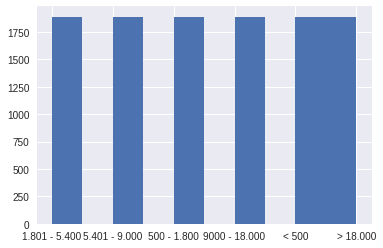

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train.values, y_train.values)
X_rus = pd.DataFrame(data = X_rus, columns = X_train.columns)
y_rus = pd.DataFrame(data = y_rus, columns = y_train.columns)
y_rus.idxmax(axis=1).hist()

Train on 11334 samples, validate on 58221 samples
Epoch 1/200
11334/11334 [==============================] - 2s 196us/step - loss: 0.6486 - acc: 0.8338 - val_loss: 0.6344 - val_acc: 0.8324
Epoch 2/200
11334/11334 [==============================] - 2s 142us/step - loss: 0.6114 - acc: 0.8371 - val_loss: 0.6021 - val_acc: 0.8302
Epoch 3/200
11334/11334 [==============================] - 2s 143us/step - loss: 0.5877 - acc: 0.8389 - val_loss: 0.5792 - val_acc: 0.8296
Epoch 4/200
11334/11334 [==============================] - 2s 142us/step - loss: 0.5698 - acc: 0.8400 - val_loss: 0.5653 - val_acc: 0.8278
Epoch 5/200
11334/11334 [==============================] - 2s 142us/step - loss: 0.5579 - acc: 0.8402 - val_loss: 0.5542 - val_acc: 0.8283
Epoch 6/200
11334/11334 [==============================] - 2s 141us/step - loss: 0.5470 - acc: 0.8410 - val_loss: 0.5476 - val_acc: 0.8265
Epoch 7/200
11334/11334 [==============================] - 2s 140us/step - loss: 0.5377 - acc: 0.8418 - val_loss: 0.

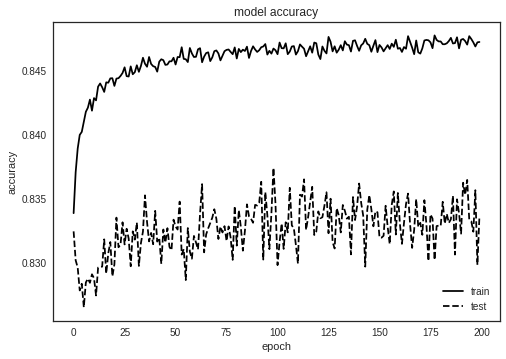

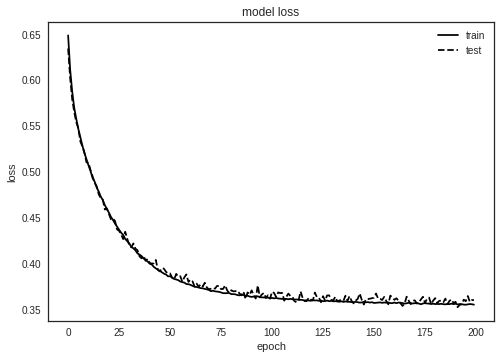

In [0]:
model_rus = Sequential()
model_rus.add(Dense(75, activation='tanh', input_dim=79,kernel_regularizer = regularizers.l2(l = 0.001)))
model_rus.add(Dropout(0.15))
model_rus.add(Dense(75, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.001)))
model_rus.add(Dropout(0.15))
model_rus.add(Dense(50, activation='tanh',kernel_regularizer = regularizers.l2(l = 0.001)))
model_rus.add(Dropout(0.15))
model_rus.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.07, decay=1e-6, momentum=0.9, nesterov=True)




model_rus.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#model.fit(X_train.values, y_train.values,epochs=20, batch_size=100, validation_data=(X_test.values, y_test.values))
#score = model.evaluate(X_test.values, y_test.values, batch_size=100)


#history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=2000, verbose=1)

history = model_rus.fit(X_rus.values, y_rus.values,epochs=200, batch_size=128,verbose=1, validation_data=(X_test.values, y_test.values))#, callbacks = [cp_callback])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],'k-')
plt.plot(history.history['val_acc'],'k--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],'k-')
plt.plot(history.history['val_loss'],'k--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
X_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11334 entries, 0 to 11333
Data columns (total 79 columns):
num_pess                                                                                                            11334 non-null float64
idade                                                                                                               11334 non-null float64
pess_cel                                                                                                            11334 non-null float64
anos_estudo                                                                                                         11334 non-null float64
horas_semana                                                                                                        11334 non-null float64
uf__Centro-Oeste                                                                                                    11334 non-null float64
uf__Nordeste                                             

In [0]:
# Create model without trailing softmax
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model_rus)
#analyzer = innvestigate.create_analyzer("deep_taylor.bounded", model_wo_softmax, low = 0, high = 1)

analyzer = innvestigate.create_analyzer("lrp.z", model_wo_softmax)#, low = 0, high = 1)



LRP_class_0 = np.empty((0,79), int)
LRP_class_1 = np.empty((0,79), int)
LRP_class_2 = np.empty((0,79), int)
LRP_class_3 = np.empty((0,79), int)
LRP_class_4 = np.empty((0,79), int)
LRP_class_5 = np.empty((0,79), int)

for i in range(len(class_0_samples)):
  a = analyzer.analyze(class_0_samples.ix[class_0_ix[i]].reshape(1,79))
  LRP_class_0 = np.vstack((LRP_class_0,a))

for i in range(len(class_1_samples)):
  a = analyzer.analyze(class_1_samples.ix[class_1_ix[i]].reshape(1,79))
  LRP_class_1 = np.vstack((LRP_class_1,a))
  
for i in range(len(class_2_samples)):
  a = analyzer.analyze(class_2_samples.ix[class_2_ix[i]].reshape(1,79))
  LRP_class_2 = np.vstack((LRP_class_2,a))
  
for i in range(len(class_3_samples)):
  a = analyzer.analyze(class_3_samples.ix[class_3_ix[i]].reshape(1,79))
  LRP_class_3 = np.vstack((LRP_class_3,a))
  
for i in range(len(class_4_samples)):
  a = analyzer.analyze(class_4_samples.ix[class_4_ix[i]].reshape(1,79))
  LRP_class_4 = np.vstack((LRP_class_4,a))
  
for i in range(len(class_5_samples)):
  a = analyzer.analyze(class_5_samples.ix[class_5_ix[i]].reshape(1,79))
  LRP_class_5 = np.vstack((LRP_class_5,a))

LRP_class_0_df = pd.DataFrame(data = LRP_class_0,columns = class_0_samples.columns)
LRP_class_1_df = pd.DataFrame(data = LRP_class_1,columns = class_1_samples.columns)
LRP_class_2_df = pd.DataFrame(data = LRP_class_2,columns = class_2_samples.columns)
LRP_class_3_df = pd.DataFrame(data = LRP_class_3,columns = class_3_samples.columns)
LRP_class_4_df = pd.DataFrame(data = LRP_class_4,columns = class_4_samples.columns)
LRP_class_5_df = pd.DataFrame(data = LRP_class_5,columns = class_5_samples.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3

In [0]:
LRP_class_0_df['class'] = 'Class 1'
LRP_class_1_df['class'] = 'Class 2'
LRP_class_2_df['class'] = 'Class 3'
LRP_class_3_df['class'] = 'Class 4'
LRP_class_4_df['class'] = 'Class 5'
LRP_class_5_df['class'] = 'Class 6'
frames = [LRP_class_0_df, LRP_class_1_df, LRP_class_2_df,LRP_class_3_df,LRP_class_4_df,LRP_class_5_df]
LRP_class = pd.concat(frames)

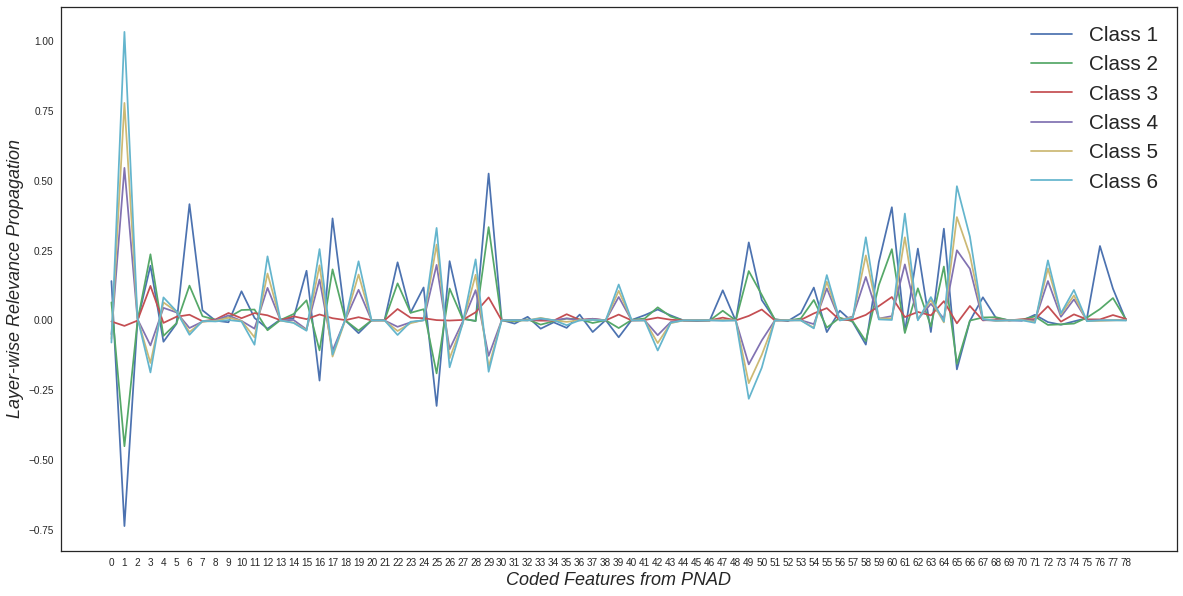

In [0]:
#plt.imshow(np.expand_dims(analysis.squeeze(),axis = 0), cmap='seismic', interpolation='nearest')
#plt.show()
plt.figure(figsize=(20,10))
plt.plot(LRP_class_0_df.mean(axis = 0).values)
plt.plot(LRP_class_1_df.mean(axis = 0).values)
plt.plot(LRP_class_2_df.mean(axis = 0).values)
plt.plot(LRP_class_3_df.mean(axis = 0).values)
plt.plot(LRP_class_4_df.mean(axis = 0).values)
plt.plot(LRP_class_5_df.mean(axis = 0).values)
plt.legend(['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], fontsize = 'xx-large')
plt.xticks(list(range(0,79)))# list(LRP_class_3_df.columns), rotation='vertical')
plt.ylabel('Layer-wise Relevance Propagation', fontsize = 18, fontstyle = 'oblique')
plt.xlabel('Coded Features from PNAD', fontsize = 18, fontstyle = 'oblique')
plt.show()

In [0]:

LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q]['grupo_atividade__Serviços domésticos'].value_counts()

0.000000    4613
0.423145       1
0.431028       1
0.760485       1
0.427116       1
0.427089       1
0.423179       1
0.423176       1
0.427079       1
0.752560       1
0.419248       1
0.427036       1
0.426776       1
0.411395       1
0.415274       1
0.430842       1
0.744440       1
0.419079       1
0.419062       1
0.422893       1
0.418981       1
0.422885       1
0.427142       1
0.415431       1
0.423264       1
0.415487       1
0.427546       1
0.419732       1
0.411884       1
0.427503       1
            ... 
0.419906       1
0.431585       1
0.753787       1
0.412027       1
0.427643       1
0.419816       1
0.416324       1
0.420250       1
0.428088       1
0.432010       1
0.416843       1
0.432457       1
0.424626       1
0.747581       1
0.424549       1
0.432332       1
0.424515       1
0.420606       1
0.763051       1
0.432271       1
0.408829       1
0.428346       1
0.424438       1
0.412705       1
0.420508       1
0.754801       1
0.432071       1
0.428157      

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,0,'Classe')

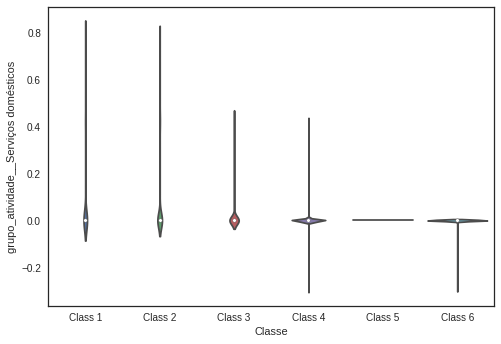

In [0]:
coluna_x =77
q = LRP_class[LRP_class.columns[coluna_x]].quantile(1)

#f, ax = plt.subplots()
sns.violinplot(x="class", y=LRP_class.columns[coluna_x], data=LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q], inner = 'box')
plt.xlabel('Classe')
#plt.ylabel('Activity: Public administration')
#plt.plot(LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q][LRP_class.columns[coluna_x]].mean())
#sns.despine(offset=10, trim=True)


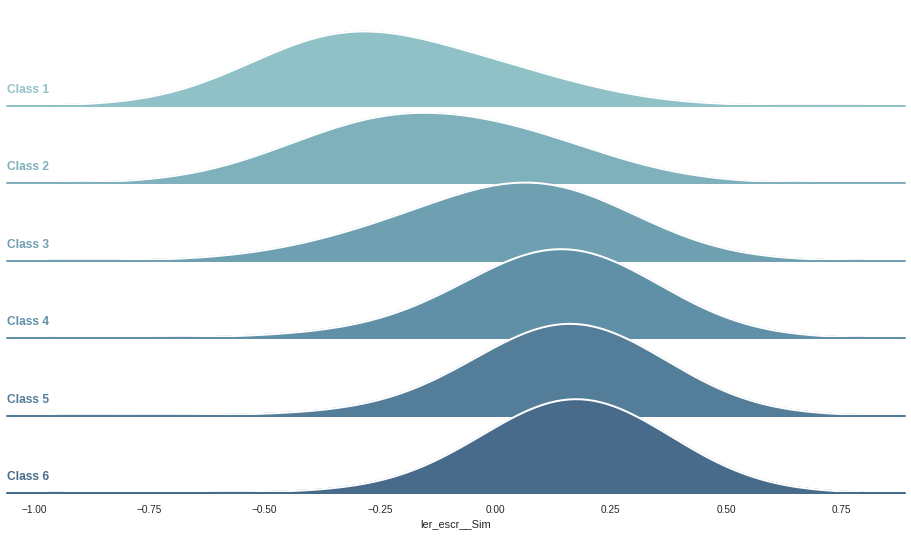

In [0]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q], row="class", hue="class",  aspect=10, palette=pal, size=1.3)

# Draw the densities in a few steps
g.map(sns.kdeplot, LRP_class.columns[coluna_x], clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, LRP_class.columns[coluna_x], clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, LRP_class.columns[coluna_x])

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [0]:
LRP_class[LRP_class[LRP_class.columns[coluna_x]] < q][LRP_class.columns[coluna_x]]

111   -0.194926
213   -0.281120
492   -0.194387
660   -0.194669
732   -0.280487
3     -0.195334
15    -0.280506
85    -0.195118
87    -0.280565
90    -0.278956
96    -0.193809
143   -0.195215
151   -0.278397
162   -0.314202
165   -0.195260
171   -0.280609
221   -0.278328
232   -0.279402
259   -0.194894
272   -0.194608
331   -0.279208
404   -0.195204
444   -0.193003
460   -0.195263
477   -0.195027
490   -0.194633
517   -0.317663
528   -0.280563
537   -0.195162
538   -0.278230
         ...   
614   -0.312976
620   -0.317407
621   -0.318636
640   -0.319537
644   -0.320410
649   -0.194423
651   -0.317712
654   -0.317382
666   -0.319444
673   -0.311926
678   -0.280408
695   -0.316407
697   -0.309736
699   -0.309171
709   -0.312622
711   -0.316827
712   -0.316294
713   -0.315968
728   -0.314944
735   -0.194529
736   -0.319526
738   -0.319732
753   -0.195064
755   -0.311361
762   -0.280285
765   -0.313341
775   -0.315190
778   -0.318870
788   -0.318111
796   -0.313540
Name: uf__Nordeste, Leng

In [0]:
coded_features = dict(zip(range(0,79),list(X_train.columns)))

In [0]:
print(coded_features[1])
print(coded_features[3])
print(coded_features[6])
print(coded_features[11])
print(coded_features[12])
print(coded_features[16])
print(coded_features[19])
print(coded_features[25])
print(coded_features[28])
print(coded_features[29])
print(coded_features[35])
print(coded_features[39])
print(coded_features[42])
print(coded_features[49])
print(coded_features[50])
print(coded_features[54])
print(coded_features[55])
print(coded_features[58])
print(coded_features[60])
print(coded_features[65])
print(coded_features[66])
print(coded_features[72])
print(coded_features[74])
print(coded_features[76])
print(coded_features[77])

idade
anos_estudo
uf__Nordeste
domicilio__Urbana
area__Capital
sexo__Homem
cor__Branca
ler_escr__Sim
tipo_dom__Apartamento
tipo_dom__Casa
abst_agua__Rede geral de distribuição 
dejetos__Rede geral, rede pluvial ou fossa ligada à rede
lixo__Coletado diretamente por serviço de limpeza 
ori_energ__Utiliza ao menos uma fonte de energia eletrica
disp_energ__Diária, em tempo integral
geladeira__Sim, de 1 porta
geladeira__Sim, de 2 (ou mais) portas
televisao__Sim, somente de tela fina (LED, LCD ou plasma)
computador__Não
automovel__Sim 
grupo_atividade__Administração pública, defesa e seguridade social 
grupo_atividade__Educação, saúde humana e serviços sociais
grupo_atividade__Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas
grupo_atividade__Sem atividade
grupo_atividade__Serviços domésticos


In [0]:
for key, value in sorted(coded_features.items(), key=lambda x: x[0]): 
    print("{} : {}".format(key, value))

0 : num_pess
1 : idade
2 : pess_cel
3 : anos_estudo
4 : horas_semana
5 : uf__Centro-Oeste
6 : uf__Nordeste
7 : uf__Norte
8 : uf__Sudeste
9 : uf__Sul
10 : domicilio__Rural
11 : domicilio__Urbana
12 : area__Capital
13 : area__Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital) 
14 : area__Resto da RM (Região Metropolitana, excluindo a capital)
15 : area__Resto da UF  (Unidade da Federação, excluindo a região metropolitana e a RIDE)
16 : sexo__Homem
17 : sexo__Mulher
18 : cor__Amarela
19 : cor__Branca
20 : cor__Ignorado
21 : cor__Indígena
22 : cor__Parda 
23 : cor__Preta
24 : ler_escr__Não 
25 : ler_escr__Sim
26 : freq_escola__Não 
27 : freq_escola__Sim
28 : tipo_dom__Apartamento
29 : tipo_dom__Casa
30 : tipo_dom__Habitação em casa de cômodos, cortiço ou cabeça de porco
31 : abst_agua__Fonte ou nascente 
32 : abst_agua__Outra (especifique)
33 : abst_agua__Poço profundo ou artesiano 
34 : abst_agua__Poço raso, freático ou cacimba 
35 : abst_agua__Rede geral d

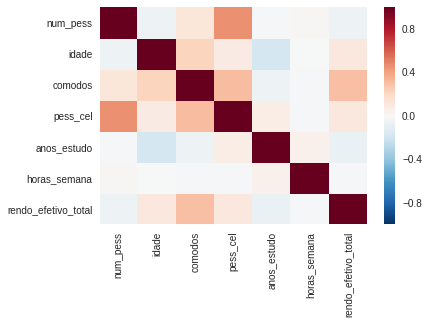

In [0]:
# calculate the correlation matrix
corr = pnad_completo.corr()

# plot the heatmap
sns.heatmap(corr)

In [0]:
sns.set(style="ticks")
sns.hist(pnad_completo)

AttributeError: ignored

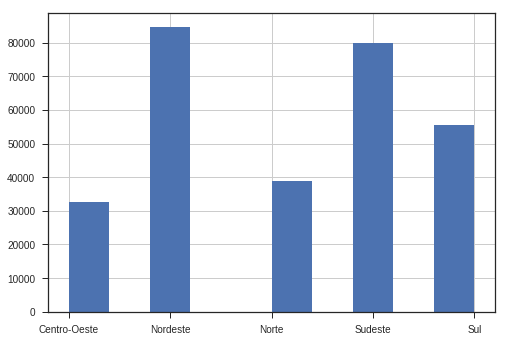

In [0]:
pnad_completo.uf.hist()
#plt.xticks(y_test.columns)
plt.show()